In [306]:
import numpy as np
from matplotlib import pyplot as plt
import astropy
import scipy

In [307]:
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 17
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.linewidth'] = 1

## On-Off Spectra

In [308]:
on_line = np.load('data/on_line.npy')
off_line = np.load('data/off_line.npy')

In [309]:
def calc_avg_power_fft(data):
    fft = np.fft.fft(data)
    pow_data = np.abs(fft)**2
    avg_data = np.mean(pow_data, axis=0)
    return np.fft.fftshift(avg_data)

def calc_median_power_fft(data):
    fft = np.fft.fft(data)
    pow_data = np.abs(fft)**2
    avg_data = np.median(pow_data, axis=0)
    return np.fft.fftshift(avg_data)

def calc_freq(samples, frequency):
    return np.fft.fftshift(np.fft.fftfreq(samples, d=1/frequency))


In [310]:
on_line.shape

(20000, 2048)

In [311]:
off_line.shape

(2048,)

(900, 1050)

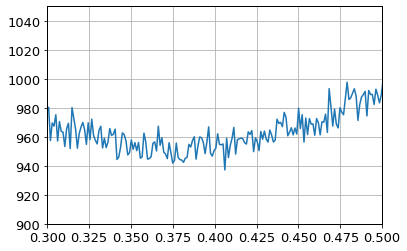

In [312]:
avg_fft = calc_avg_power_fft(on_line)
freq = calc_freq(samples=2048, frequency=2.2)
plt.plot(freq, avg_fft)
plt.xlim(0.3,0.5)
plt.ylim(900,1050)

In [313]:
avg_fft.shape

(2048,)

(950, 1050)

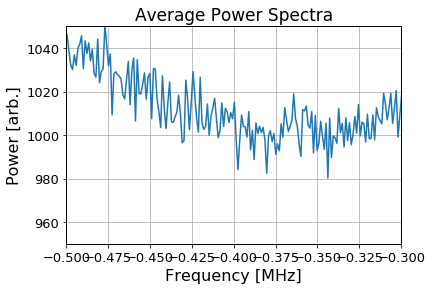

In [314]:
plt.plot(freq, np.fft.fftshift(off_line))
plt.title("Average Power Spectra")
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arb.]')
plt.xlim(-0.5,-0.3)
plt.ylim(950,1050)

## Correct data!

## Line Shape

In [315]:
on_line_blocks = np.load('data/on_line_raw.npy')
off_line_blocks = np.load('data/off_line_raw.npy')
on_line_pow_avg = np.load('data/on_line_pow_avg.npy')
off_line_pow_avg = np.load('data/off_line_pow_avg.npy')

# Raspberry Pi 2.2 MHz 2048 samples 
# 3:30pm zenith off/on
# on center frequency 1420 MHz, off center 1420.8 MHz
# 3:50pm blackbody observations

(-0.85, 0.85)

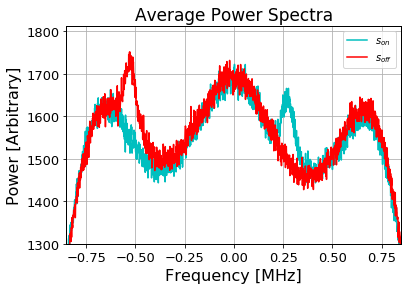

In [316]:
s_on = calc_avg_power_fft(on_line_blocks)
s_off = calc_avg_power_fft(off_line_blocks)
freq = calc_freq(samples=2048, frequency=2.2)
plt.plot(freq, s_on, label='$s_{on}$', color='c')
plt.plot(freq, s_off, label='$s_{off}$', color='r')
plt.legend()
plt.title('Average Power Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')
plt.ylim(1300,)
plt.xlim(-0.85, 0.85)

(-0.85, 0.85)

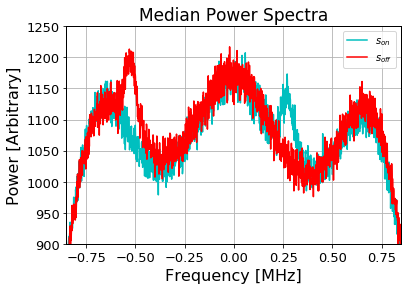

In [317]:
s_on = calc_median_power_fft(on_line_blocks)
s_off = calc_median_power_fft(off_line_blocks)
freq = calc_freq(samples=2048, frequency=2.2)
plt.plot(freq, s_on, label='$s_{on}$', color='c')
plt.plot(freq, s_off, label='$s_{off}$', color='r')
plt.legend()
plt.title('Median Power Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')
plt.ylim(900,1250)
plt.xlim(-0.85, 0.85)

No handles with labels found to put in legend.


Text(0, 0.5, 'Power Ratio')

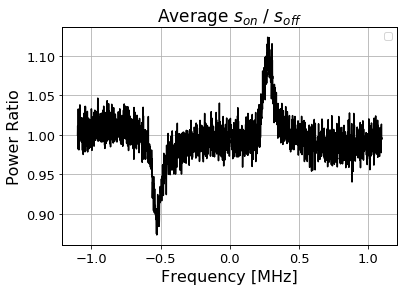

In [318]:
s_on = calc_avg_power_fft(on_line_blocks)
s_off = calc_avg_power_fft(off_line_blocks)
# freq = calc_freq(samples=256, frequency=2.2)
plt.plot(freq, s_on/s_off, color='black')
plt.legend()
plt.title('Average $s_{on}$ / $s_{off}$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power Ratio')

### Smoothed Spectra

(-0.85, 0.85)

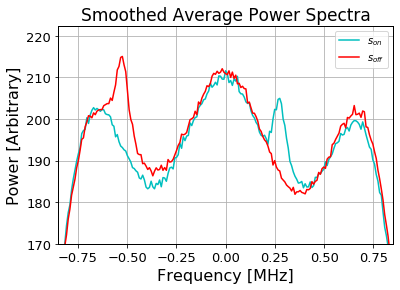

In [319]:
s_on_smooth = calc_avg_power_fft(on_line_blocks.reshape((-1,256)))
s_off_smooth = calc_avg_power_fft(off_line_blocks.reshape((-1,256)))
freq = calc_freq(samples=256, frequency=2.2)
plt.plot(freq, s_on_smooth, label='$s_{on}$', color='c')
plt.plot(freq, s_off_smooth, label='$s_{off}$', color='r')
plt.legend()
plt.title('Smoothed Average Power Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')
plt.ylim(170,)
plt.xlim(-0.85, 0.85)

(-0.85, 0.85)

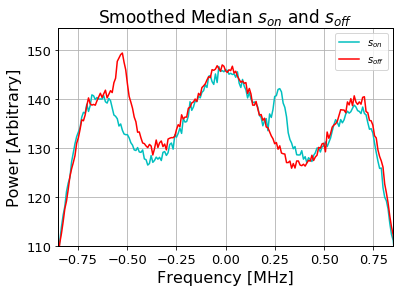

In [320]:
s_on_smooth = calc_median_power_fft(on_line_blocks.reshape((-1,256)))
s_off_smooth = calc_median_power_fft(off_line_blocks.reshape((-1,256)))
freq = calc_freq(samples=256, frequency=2.2)
plt.plot(freq, s_on_smooth, label='$s_{on}$', color='c')
plt.plot(freq, s_off_smooth, label='$s_{off}$', color='r')
plt.legend()
plt.title('Smoothed Median $s_{on}$ and $s_{off}$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')
plt.ylim(110,)
plt.xlim(-0.85, 0.85)

No handles with labels found to put in legend.


Text(0, 0.5, 'Power [Arbitrary]')

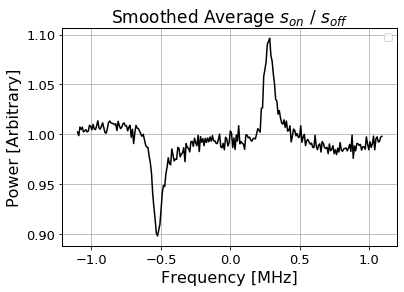

In [321]:
s_on_smooth = calc_avg_power_fft(on_line_blocks.reshape((-1,256)))
s_off_smooth = calc_avg_power_fft(off_line_blocks.reshape((-1,256)))
freq = calc_freq(samples=256, frequency=2.2)
plt.plot(freq, s_on_smooth/s_off_smooth, color='black')
plt.legend()
plt.title('Smoothed Average $s_{on}$ / $s_{off}$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')

Text(0, 0.5, 'Power [Arbitrary]')

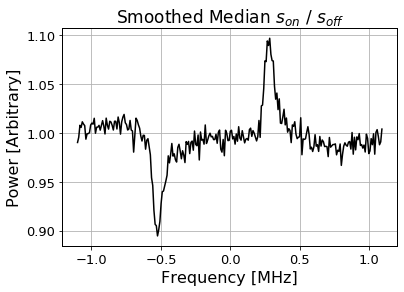

In [322]:
s_on_smooth = calc_median_power_fft(on_line_blocks.reshape((-1,256)))
s_off_smooth = calc_median_power_fft(off_line_blocks.reshape((-1,256)))
freq = calc_freq(samples=256, frequency=2.2)
plt.plot(freq, s_on_smooth/s_off_smooth, color='black')
# plt.legend()
plt.title('Smoothed Median $s_{on}$ / $s_{off}$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')

In [323]:
on_line_pow_avg.shape

(2048,)

## Line Intensity

In [324]:
scal = np.load('data/cal_raw_zenith.npy')
scold = np.load('data/cold_raw_zenith.npy')
scold.shape

(1000, 2048)

In [325]:
Tcal = 300 #K
scal_power = calc_avg_power_fft(scal)
scold_power = calc_avg_power_fft(scold)

G = Tcal / np.mean((scal_power[400:1200] - scold_power[400:1200]))
G *= np.mean(scold_power[400:1200])

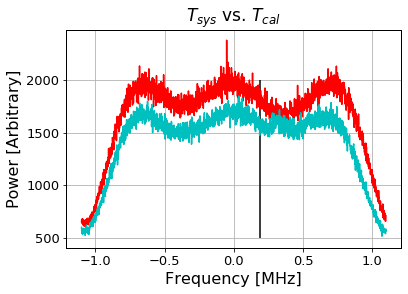

In [326]:
freq = calc_freq(samples=2048, frequency=2.2)
plt.plot(freq, scal_power, label='blackbody', color='red')
plt.plot(freq, scold_power, label='sky', color='c')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')
plt.title('$T_{sys}$ vs. $T_{cal}$')
plt.vlines(freq[1200], 500, 2000)

In [327]:
print('Calibrated value of G:', G)

Calibrated value of G: 1818.8638418464284


Text(0, 0.5, '$T_{line}$ [K]')

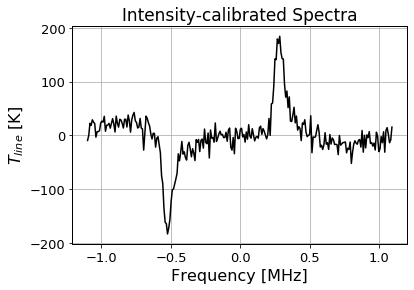

In [328]:
sline = s_on_smooth / s_off_smooth
Tline = sline * G - np.median(sline*G)
freq = calc_freq(samples=256, frequency=2.2)
plt.plot(freq, Tline, color='black')
plt.title('Intensity-calibrated Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('$T_{line}$ [K]')

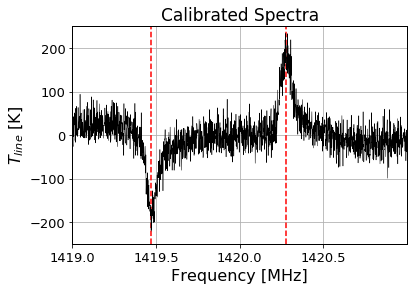

In [332]:
sline = s_on / s_off
Tline = sline * G - np.median(sline*G) # subtract the system temperature
# ratio fit a five degree polynomial?
freq = calc_freq(samples=2048, frequency=2.2)
plt.plot(freq + 1420, Tline, color='black', lw=.5)
plt.title('Calibrated Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('$T_{line}$ [K]')
plt.ylim(-250,250)
plt.xlim(1419, 1421)
plt.xticks(np.arange(1419, 1421, step=0.5))
plt.vlines(freq[np.argmin(sline)] + 1420, -250,250, color='red', linestyle='--')
plt.vlines(freq[np.argmax(sline)] + 1420, -250,250, color='red', linestyle='--')

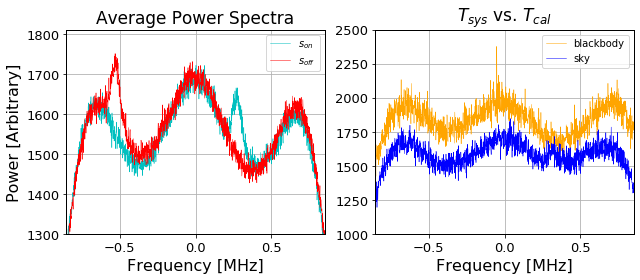

In [331]:
fig, axs = plt.subplots(1, 2, figsize=(9,4))
ax = axs[0]
s_on = calc_avg_power_fft(on_line_blocks)
s_off = calc_avg_power_fft(off_line_blocks)
freq = calc_freq(samples=2048, frequency=2.2)
ax.plot(freq, s_on, label='$s_{on}$', color='c', lw=0.5)
ax.plot(freq, s_off, label='$s_{off}$', color='r', lw=0.5)
ax.legend()
ax.set_title('Average Power Spectra')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Power [Arbitrary]')
ax.set_ylim(1300,)
ax.set_xlim(-0.85, 0.85)

ax = axs[1]
freq = calc_freq(samples=2048, frequency=2.2)
ax.plot(freq, scal_power, label='blackbody', color='orange', lw=0.5)
ax.plot(freq, scold_power, label='sky', color='blue', lw=0.5)
ax.set_xlabel('Frequency [MHz]')
# ax.set_ylabel('Power [Arbitrary]')
ax.legend()
ax.set_xlim(-0.85,0.85)
ax.set_title('$T_{sys}$ vs. $T_{cal}$')
ax.set_ylim(1000,2500)
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(9,4))
ax = axs[0]

## Doppler Shift

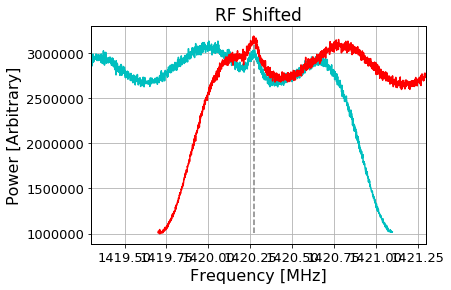

In [25]:
sline = s_on / s_off
Tline = sline * G
freq = calc_freq(samples=2048, frequency=2.2)
# freq = calc_freq(samples=256, frequency=2.2)
plt.plot(freq + 1420, s_on * G, color='c')
plt.plot(freq + 1420.8, s_off * G, color='red')
plt.title('RF Shifted')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')
# plt.ylim(1000,)
plt.xlim(1419.3, 1421.3)

nu = freq[np.argmax(s_off)] + 1420.8
plt.vlines(nu, min(s_on*G), max(s_on*G), color='gray',linestyle='--')

[ 318.03587397  317.80899119  317.5821084  ... -145.93942317 -146.16630596
 -146.39318875]


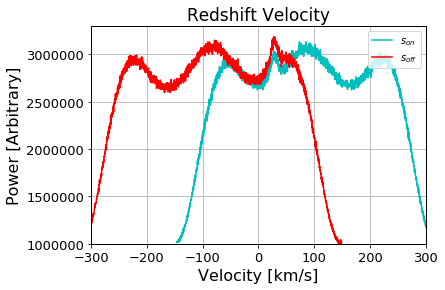

In [26]:
c = 3 * 10**5 # km/s
nu0 = 1420.4058
v_on = -c * (freq + 1420 - nu0) / nu0
v_off = -c * (freq + 1420.8 - nu0) / nu0
plt.plot(v_on, s_on * G, color='c', label='$s_{on}$')
plt.plot(v_off, s_off * G, color='red', label='$s_{off}$')
plt.ylim(1000000,)
plt.xlim(-300,300)
doppler_v = v_off[np.argmax(s_off[:800])]
# plt.plot(s_off[800:])
plt.vlines(doppler_v, 200, 1600, color='gray', linestyle='--')
# np.argmax(s_off[1200:])
plt.xlabel('Velocity [km/s]')
plt.ylabel('Power [Arbitrary]')
plt.title('Redshift Velocity')
plt.legend(loc='upper right')
print(v_on)

In [27]:
nu0 = 1420.4058
delta_nu = nu - nu0
c = 3 * 10**5 # km/s
velocity = - c * delta_nu / nu0
print('Velocity of the Hydrogen:', doppler_v, 'km/s')

Velocity of the Hydrogen: 28.59531629976945 km/s


In [28]:
# import ugradio
# correction = ugradio.doppler.get_projected_velocity(1.23,37.873199,2459627.65)

8.924963299769452 km/s


(-150, 150)

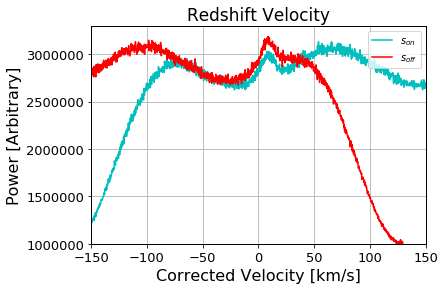

In [29]:
corrected_velocity = doppler_v - 19670.353/1e3
print(str(corrected_velocity) + ' km/s')
c = 3 * 10**5 # km/s
nu0 = 1420.4058
v_on = -c * (freq + 1420 - nu0) / nu0
v_off = -c * (freq + 1420.8 - nu0) / nu0
plt.plot(v_on - 19670.353/1e3, (s_on - np.median(sline)) * G, color='c', label='$s_{on}$')
plt.plot(v_off - 19670.353/1e3, (s_off - np.median(sline)) * G, color='red', label='$s_{off}$')
plt.ylim(1000000,)
plt.xlim(-300,300)
doppler_v = v_off[np.argmax(s_off[:800])]
# plt.plot(s_off[800:])
plt.vlines(doppler_v, 200, 1600, color='gray', linestyle='--')
# np.argmax(s_off[1200:])
plt.xlabel('Corrected Velocity [km/s]')
plt.ylabel('Power [Arbitrary]')
plt.title('Redshift Velocity')
plt.legend(loc='upper right')
plt.xlim(-150,150)
# plt.ylim()

31.61324188888814 km/s
8.182437818651813


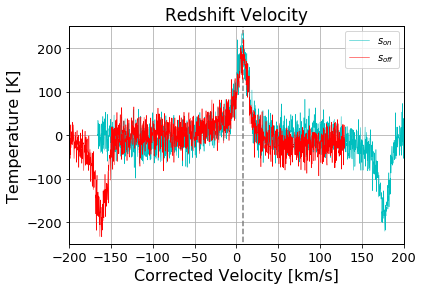

In [274]:
corrected_velocity = doppler_v - 19670.353/1e3
print(str(corrected_velocity) + ' km/s')
c = 3 * 10**5 # km/s
nu0 = 1420.4058
v_on = -c * (freq + 1420 - nu0) / nu0
v_off = -c * (freq + 1420.8 - nu0) / nu0
corrected_v_on = v_on - 19670.353/1e3
corrected_v_off = v_off - 19670.353/1e3
plt.plot(corrected_v_on, (sline - np.median(sline)) * G, color='c', label='$s_{on}$', lw=0.5)
plt.plot(corrected_v_off, -(sline - np.median(sline)) * G, color='red', label='$s_{off}$', lw=0.5)
# plt.ylim(1000000,)
# plt.xlim(-300,300)
doppler_v = v_off[np.argmax(s_off[:800])]
# plt.plot(s_off[800:])
plt.vlines(corrected_v_on[np.argmax((sline - np.median(sline)) * G)], -300, 300, color='gray', linestyle='--')
# np.argmax(s_off[1200:])
plt.xlabel('Corrected Velocity [km/s]')
plt.ylabel('Temperature [K]')
plt.title('Redshift Velocity')
plt.legend(loc='upper right')
plt.xlim(-200,200)
plt.ylim(-250, 250)
print(corrected_v_on[np.argmax((sline - np.median(sline)) * G)])

# Galactic Coordinates

## Gaussian Fitting

In [333]:
# accurate starting points
# fit one or two Gaussians
# error in gain calibration
# center at 0 since Gaussians have a 0 asymptote
# time/temperature dependent gain so have to calibrate in some time frame as data collection
#always show residual on fits

(-0.85, 0.85)

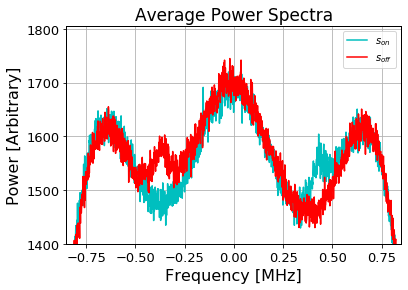

In [334]:
data_on_g = np.load('data/galactic_coords_online_raw.npy')
data_off_g = np.load('data/galactic_coords_offline_raw.npy')

s_on_g = calc_avg_power_fft(data_on_g)
s_off_g = calc_avg_power_fft(data_off_g)
freq = calc_freq(samples=2048, frequency=2.2)
plt.plot(freq, s_on_g, label='$s_{on}$', color='c')
plt.plot(freq, s_off_g, label='$s_{off}$', color='r')
plt.legend()
plt.title('Average Power Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')
plt.ylim(1400,)
plt.xlim(-0.85, 0.85)

Text(0, 0.5, '$s_{on} / s_{off}$')

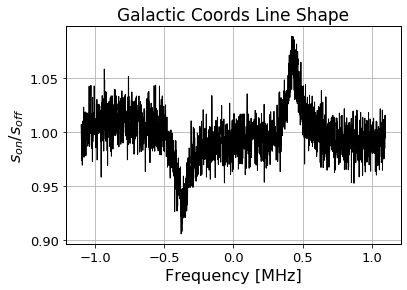

In [335]:
plt.plot(freq, s_on_g / s_off_g, color='black', lw=1)
# plt.legend()
plt.title('Galactic Coords Line Shape')
plt.xlabel('Frequency [MHz]')
plt.ylabel('$s_{on} / s_{off}$')
# plt.ylim(1400,)
# plt.xlim(-0.85, 0.85)

G = 1653.9821458444558


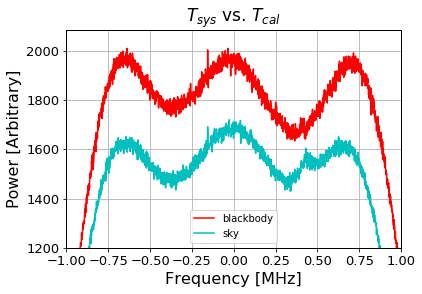

In [336]:
scal_g = np.load('data/data2_cal_raw.npy')
scold_g = data_on_g

Tcal = 300 #K
scal_power_g = calc_avg_power_fft(scal_g)
scold_power_g = calc_avg_power_fft(scold_g)

G = Tcal / np.mean((scal_power_g[400:1300] - scold_power_g[400:1300]))
G *= np.mean(scold_power_g[400:1300])

freq = calc_freq(samples=2048, frequency=2.2)
plt.plot(freq, scal_power_g, label='blackbody', color='red')
plt.plot(freq, scold_power_g, label='sky', color='c')
plt.legend()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')
plt.title('$T_{sys}$ vs. $T_{cal}$')
plt.xlim(-1, 1)
plt.ylim(1200,)
# plt.vlines(freq[400], 500, 2000)
print('G =', G)

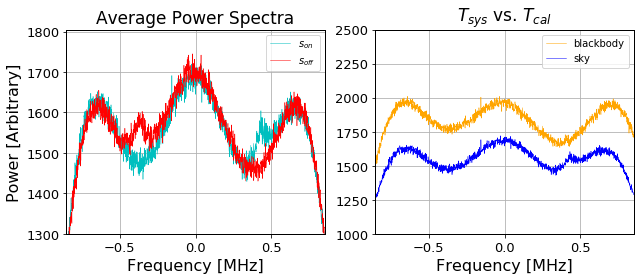

In [337]:
fig, axs = plt.subplots(1, 2, figsize=(9,4))
ax = axs[0]
# s_on = calc_avg_power_fft(data_on_g)
# s_off = calc_avg_power_fft(data_off_g)
freq = calc_freq(samples=2048, frequency=2.2)
ax.plot(freq, s_on_g, label='$s_{on}$', color='c', lw=0.5)
ax.plot(freq, s_off_g, label='$s_{off}$', color='r', lw=0.5)
ax.legend()
ax.set_title('Average Power Spectra')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Power [Arbitrary]')
ax.set_ylim(1300,)
ax.set_xlim(-0.85, 0.85)

ax = axs[1]
freq = calc_freq(samples=2048, frequency=2.2)
ax.plot(freq, scal_power_g, label='blackbody', color='orange', lw=0.5)
ax.plot(freq, scold_power_g, label='sky', color='blue', lw=0.5)
ax.set_xlabel('Frequency [MHz]')
# ax.set_ylabel('Power [Arbitrary]')
ax.legend()
ax.set_xlim(-0.85,0.85)
ax.set_title('$T_{sys}$ vs. $T_{cal}$')
ax.set_ylim(1000,2500)
plt.tight_layout()

([<matplotlib.axis.XTick at 0x7fe558ede150>,
 <a list of 5 Text xticklabel objects>)

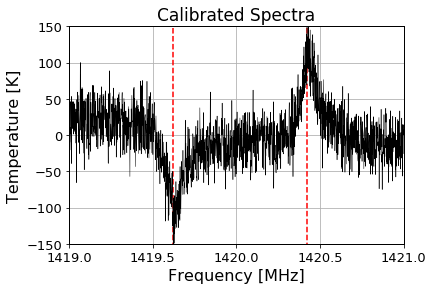

In [340]:
s_on_g_smooth = calc_avg_power_fft(data_on_g.reshape((-1, 256)))
s_off_g_smooth = calc_avg_power_fft(data_off_g.reshape((-1, 256)))
sline_g = s_on_g / s_off_g
freq = calc_freq(2048, 2.2)
plt.plot(freq + 1420, (sline_g - np.median(sline_g)) * G, color='black',lw=.5)
# plt.legend()
plt.title('Calibrated Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.ylim(-150,150)
plt.xlim(1419, 1421)
plt.vlines(freq[np.argmin(sline_g)] + 1420, -200,200, color='red', linestyle='--')
plt.vlines(freq[np.argmax(sline_g)] + 1420, -200,200, color='red', linestyle='--')
plt.xticks([1419, 1419.5, 1420, 1420.5, 1421])

## Doppler Shift

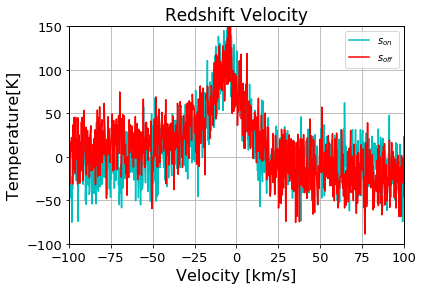

In [341]:
c = 3 * 10**5 # km/s
nu0 = 1420.4058
v_on = -c * (freq + 1420 - nu0) / nu0
v_off = -c * (freq + 1420.8 - nu0) / nu0
plt.plot(v_on, (sline_g - np.median(sline_g)) * G, color='c', label='$s_{on}$')
plt.plot(v_off, -(sline_g - np.median(sline_g)) * G, color='red', label='$s_{off}$')
# plt.ylim(1000000,)
# plt.xlim(-300,300)
doppler_v = v_off[np.argmax(s_off_g[:80])]
# plt.plot(s_off[800:])
plt.vlines(doppler_v - 10, -300, 300, color='gray', linestyle='--')
# np.argmax(s_off[1200:])
plt.xlim(-100,100)
plt.ylim(-100, 150)
plt.xlabel('Velocity [km/s]')
plt.ylabel('Temperature[K]')
plt.title('Redshift Velocity')
plt.legend(loc='upper right')
# print(v_on)

Velocity = -20.461033634341582


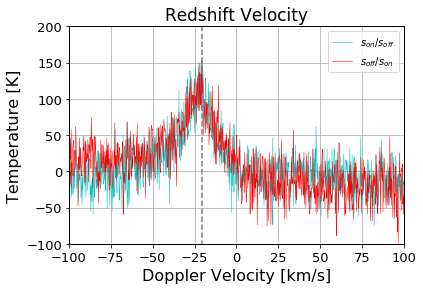

In [345]:
correction = 17.004
# doppler_v - 
# corrected_velocity = doppler_v - correction
# print(str(corrected_velocity) + ' km/s')
c = 3 * 10**5 # km/s
nu0 = 1420.4058
v_on = -c * (freq + 1420 - nu0) / nu0
v_off = -c * (freq + 1420.8 - nu0) / nu0
corrected_v_on = v_on - correction
corrected_v_off = v_off - correction
plt.plot(corrected_v_on, (sline_g - np.median(sline_g)) * G, color='c', label='$s_{on}/s_{off}$', lw=.5)
plt.plot(corrected_v_off, -(sline_g - np.median(sline_g)) * G, color='red', label='$s_{off}/s_{on}$', lw=.5)
doppler_v = v_off[np.argmax(s_off_g[:80])]
final_velocity = corrected_v_on[np.argmax((sline_g - np.median(sline_g)) * G)]
plt.vlines(final_velocity, -300, 300, color='gray', linestyle='--')
plt.xlabel('Doppler Velocity [km/s]')
plt.ylabel('Temperature [K]')
plt.title('Redshift Velocity')
plt.legend(loc='upper right')
plt.xlim(-100,100)
plt.ylim(-100, 200)
# print(corrected_v_on[np.argmax((sline - np.median(sline)) * G)])
print("Velocity =", final_velocity)

In [343]:
x = corrected_v_on[80:]
y = ((sline_g - np.median(sline_g)) * G)[80:]
# plt.plot(x, y)

In [344]:
import ugradio

ModuleNotFoundError: No module named 'ugradio'

In [113]:
params_on = ugradio.gauss.gaussfit(x, y, amp=200, avg=-20, sig=25)
print(params_on)
amp, avg, sig = [params_on[key][0] for key in params_on]

{'amp': array([100.84906396]), 'avg': array([-23.46680068]), 'sig': array([10.16047026])}


A=100.85, $\mu$=-23.47, $\sigma$=10.16


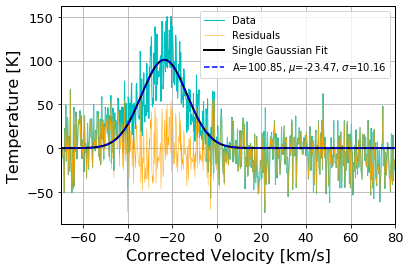

In [100]:
gauss_y = ugradio.gauss.gaussval(x, params_on['amp'], params_on['avg'], params_on['sig'])
residuals = y - gauss_y
plt.plot(x, y, lw=1, color="c", label='Data')
plt.plot(x, residuals, lw=0.5, color='orange', label="Residuals")
plt.plot(x, gauss_y, lw=2, color='black', label="Single Gaussian Fit")
plt.plot(x, gauss_y, 'b--', label="A={:0.2f}, $\mu$={:0.2f}, $\sigma$={:0.2f}".format(amp, avg, sig))

# "A={:0.2f}, $\mu$={:0.2f}, $\sigma$={:0.2f}".format(amp, avg, sig)
plt.legend()
plt.xlim(-70,80)
plt.ylabel("Temperature [K]")
plt.xlabel('Corrected Velocity [km/s]')
print("A={:0.2f}, $\mu$={:0.2f}, $\sigma$={:0.2f}".format(amp, avg, sig))

In [111]:
params_on_double = ugradio.gauss.gaussfit(x, y, amp=[200,150], avg=[-20, -30], sig=[25,50])

print(params_on_double)
amp, avg, sig = [params_on_double[key] for key in params_on_double]

{'amp': array([ 24.32166208, 105.97918095]), 'avg': array([-44.47734983, -22.02912605]), 'sig': array([-9.29736064,  8.20114031])}


Text(0.5, 0, 'Corrected Velocity [km/s]')

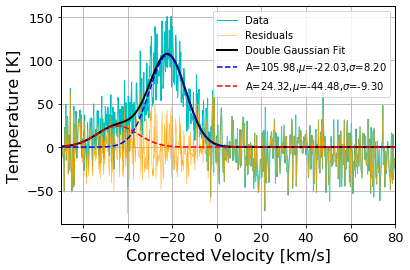

In [102]:
gauss_y = ugradio.gauss.gaussval(x, params_on_double['amp'], params_on_double['avg'], params_on_double['sig'])
gauss_y_1 = ugradio.gauss.gaussval(x, params_on_double['amp'][:1],params_on_double['avg'][:1], params_on_double['sig'][:1])
gauss_y_2 = ugradio.gauss.gaussval(x, params_on_double['amp'][1:], params_on_double['avg'][1:], params_on_double['sig'][1:])
residuals = y - gauss_y
plt.plot(x, y, lw=1, color="c", label='Data')
plt.plot(x, residuals, lw=0.5, color='orange', label="Residuals")
plt.plot(x, gauss_y, lw=2, color='black', label="Double Gaussian Fit")

plt.plot(x, gauss_y_2, 'b--', label="A={:0.2f},$\mu$={:0.2f},$\sigma$={:0.2f}".format(amp[1], avg[1], sig[1]))
plt.plot(x, gauss_y_1, 'r--', label="A={:0.2f},$\mu$={:0.2f},$\sigma$={:0.2f}".format(amp[0], avg[0], sig[0]))
# "A={:0.2f}, $\mu$={:0.2f}, $\sigma$={:0.2f}".format(amp, avg, sig)
plt.legend()
plt.xlim(-70,80)
plt.ylabel("Temperature [K]")
plt.xlabel('Corrected Velocity [km/s]')
# print("A={:0.2f}, $\mu$={:0.2f}, $\sigma$={:0.2f}".format(amp, avg, sig))

In [103]:
def reduced_chisq(x, y, params):
    chisq_r = []
    for i in range(10):
#         ys = np.fft.fftshift(s_line - np.median(s_line)) * G
#         xs = velocity_on + correction
        chisq_r.append(np.sum(np.abs(y - ugradio.gauss.gaussval(x, params['amp'], params['avg'], params['sig']))**2) / (y.size - 3) / np.std(y[:100])**2)
    return np.average(chisq_r)

def chisq(x, y, params, sig):
    return np.sum(np.abs(y-mdl)**2/sig**2)

chisq_r_double = reduced_chisq(x, y, params_on_double)
chisq_r = reduced_chisq(x, y, params_on)
print("reduced χ^2 double = {0:0.3f}".format(np.average(chisq_r_double)))
print("reduced χ^2 single = {0:0.3f}".format(np.average(chisq_r)))

reduced χ^2 double = 1.187
reduced χ^2 single = 1.222


In [104]:
keys = ['amp', 'avg', 'sig']
def chisq_params(x, y, params):
    final_errors = []
    for j in range(3):
        copy_params = params
        chisq = []
        key = keys[j]
        param = copy_params[key][0]
        param_range = np.linspace(param - 100, param + 100, 10000)
#         print(param)
        for i in range(10000):
            copy_params[key] = param_range[i]
            chisq.append(np.sum(np.abs(y - 
                                       ugradio.gauss.gaussval(x,copy_params[keys[0]], copy_params[keys[1]], copy_params[keys[2]]))**2) / np.std(y[:100])**2)

        chisq = np.array(chisq)
        param_chisq = chisq - np.min(chisq)
        upper_bound = np.max([np.where(param_chisq <= 4)])
        lower_bound = np.min([np.where(param_chisq <= 4)])
        errors = [int(lower_bound), int(upper_bound)]
        final_err = param_range[lower_bound] - param_range[np.argmin(param_chisq)]
        final_errors.append(abs(final_err))
        copy_params[key] = [param]
    return final_errors
        

In [105]:
errors = chisq_params(x, y, params_on)

In [106]:
print(errors)

[5.220522052205226, 0.7400740074007501, 0.6800680068006812]


In [107]:
keys = ['amp', 'avg', 'sig']
def chisq_params_double(x, y, params):
    final_errors = []
    for k in range(2):
        for j in range(3):
            copy_params = params
            print(copy_params)
            chisq = []
            key = keys[j]
            param = copy_params[key][k]
            param_range = np.linspace(param - 100, param + 100, 10000)
#             print(param)
            for i in range(10000):
                copy_params[key][k] = param_range[i]
                chisq.append(np.sum(np.abs(y - 
                                           ugradio.gauss.gaussval(x,copy_params[keys[0]], copy_params[keys[1]], copy_params[keys[2]]))**2) / np.std(y[:100])**2)

            chisq = np.array(chisq)
            param_chisq = chisq - np.min(chisq)
            upper_bound = np.max([np.where(param_chisq <= 4)])
            lower_bound = np.min([np.where(param_chisq <= 4)])
            errors = [int(lower_bound), int(upper_bound)]
            final_err = param_range[lower_bound] - param_range[np.argmin(param_chisq)]
            final_errors.append(abs(final_err))
            copy_params[key][k] = param
    return final_errors

In [108]:
double_errors = chisq_params_double(x, y, params_on_double)

{'amp': array([ 24.32166208, 105.97918095]), 'avg': array([-44.47734983, -22.02912605]), 'sig': array([-9.29736064,  8.20114031])}
{'amp': array([ 24.32166208, 105.97918095]), 'avg': array([-44.47734983, -22.02912605]), 'sig': array([-9.29736064,  8.20114031])}
{'amp': array([ 24.32166208, 105.97918095]), 'avg': array([-44.47734983, -22.02912605]), 'sig': array([-9.29736064,  8.20114031])}
{'amp': array([ 24.32166208, 105.97918095]), 'avg': array([-44.47734983, -22.02912605]), 'sig': array([-9.29736064,  8.20114031])}
{'amp': array([ 24.32166208, 105.97918095]), 'avg': array([-44.47734983, -22.02912605]), 'sig': array([-9.29736064,  8.20114031])}
{'amp': array([ 24.32166208, 105.97918095]), 'avg': array([-44.47734983, -22.02912605]), 'sig': array([-9.29736064,  8.20114031])}


In [109]:
print(double_errors)

[5.460546054605459, 2.980298029802981, 21.042104210421044, 5.8005800580058064, 0.6400640064006495, 0.520052005200526]


A=100.85, $\mu$=-23.47, $\sigma$=10.16


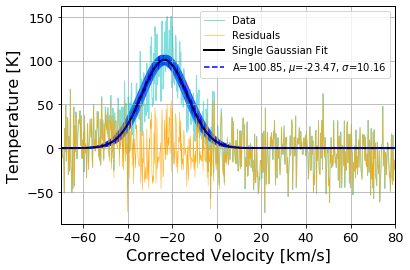

In [127]:
gauss_y = ugradio.gauss.gaussval(x, params_on['amp'], params_on['avg'], params_on['sig'])
gauss_y_err = ugradio.gauss.gaussval(x, [params_on['amp'][0] + errors[0]], [params_on['avg'] + errors[1]], [params_on['sig'][0] + errors[2]])
gauss_y_err1 = ugradio.gauss.gaussval(x, [params_on['amp'][0] + errors[0]], [params_on['avg'] + errors[1]], [params_on['sig'][0] - errors[2]])
gauss_y_err2 = ugradio.gauss.gaussval(x, [params_on['amp'][0] + errors[0]], [params_on['avg'] - errors[1]], [params_on['sig'][0] - errors[2]])
gauss_y_err3 = ugradio.gauss.gaussval(x, [params_on['amp'][0] + errors[0]], [params_on['avg'] - errors[1]], [params_on['sig'][0] + errors[2]])
gauss_y_err4 = ugradio.gauss.gaussval(x, [params_on['amp'][0] - errors[0]], [params_on['avg'] - errors[1]], [params_on['sig'][0] - errors[2]])
gauss_y_err5 = ugradio.gauss.gaussval(x, [params_on['amp'][0] - errors[0]], [params_on['avg'] - errors[1]], [params_on['sig'][0] + errors[2]])
gauss_y_err6 = ugradio.gauss.gaussval(x, [params_on['amp'][0] - errors[0]], [params_on['avg'] + errors[1]], [params_on['sig'][0] + errors[2]])
gauss_y_err7 = ugradio.gauss.gaussval(x, [params_on['amp'][0] - errors[0]], [params_on['avg'] + errors[1]], [params_on['sig'][0] - errors[2]])


residuals = y - gauss_y
plt.plot(x, y, lw=1, color="c", label='Data', alpha=0.5)
plt.plot(x, residuals, lw=0.5, color='orange', label="Residuals")
plt.plot(x, gauss_y, lw=2, color='black', label="Single Gaussian Fit")
plt.plot(x, gauss_y, 'b--', label="A={:0.2f}, $\mu$={:0.2f}, $\sigma$={:0.2f}".format(amp, avg, sig))
plt.fill_between(x, gauss_y, gauss_y_err, color='b', alpha=0.6)
plt.fill_between(x, gauss_y, gauss_y_err1, color='b', alpha=0.6)
plt.fill_between(x, gauss_y, gauss_y_err2, color='b', alpha=0.6)
plt.fill_between(x, gauss_y, gauss_y_err3, color='b', alpha=0.6)
plt.fill_between(x, gauss_y, gauss_y_err4, color='b', alpha=0.6)
plt.fill_between(x, gauss_y, gauss_y_err5, color='b', alpha=0.6)
plt.fill_between(x, gauss_y, gauss_y_err6, color='b', alpha=0.6)
plt.fill_between(x, gauss_y, gauss_y_err7, color='b', alpha=0.6)

# "A={:0.2f}, $\mu$={:0.2f}, $\sigma$={:0.2f}".format(amp, avg, sig)
plt.legend()
plt.xlim(-70,80)
plt.ylabel("Temperature [K]")
plt.xlabel('Corrected Velocity [km/s]')
print("A={:0.2f}, $\mu$={:0.2f}, $\sigma$={:0.2f}".format(amp, avg, sig))